# Memebers of the team:

Name: Mohammad Ahmed Yousry Attia ID: 20221441349 Department: (Healthcare)

Name: Clara Magdy Ghaly ID: 20221424647 Department: (Healthcare)

Name: Menna tallah Ali Ra'fat ID: 20221376690 Department: (Healthcare)

Name: Doaa Samir Elsayed ID: 2103114 Department: (AI)

# First Problem

In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
df=pd.read_csv("C:/Users/Doaa Samir/Downloads/archive (1).zip")

In [3]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

### Splitting the data into training and test

In [4]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

train.shape

(25, 2)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

### Linear Regression

In [7]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+26 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Test Time instance 
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [8]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
   Month  Sales  time
0  1-01  266.0     1
1  1-02  145.9     2
2  1-03  183.1     3
3  1-04  119.3     4
4  1-05  180.3     5 

Last few rows of Training Data 
    Month  Sales  time
20  2-09  289.9    21
21  2-10  421.6    22
22  2-11  264.5    23
23  2-12  342.3    24
24  3-01  339.7    25 

First few rows of Test Data 
    Month  Sales  time
25  3-02  440.4    26
26  3-03  315.9    27
27  3-04  439.3    28
28  3-05  401.3    29
29  3-06  437.4    30 

Last few rows of Test Data 
    Month  Sales  time
31  3-08  407.6    32
32  3-09  682.0    33
33  3-10  475.3    34
34  3-11  581.3    35
35  3-12  646.9    36 



Now that our training and test data has been modified, let us go ahead use linear regression to build the model on the training data and test the model on the test data

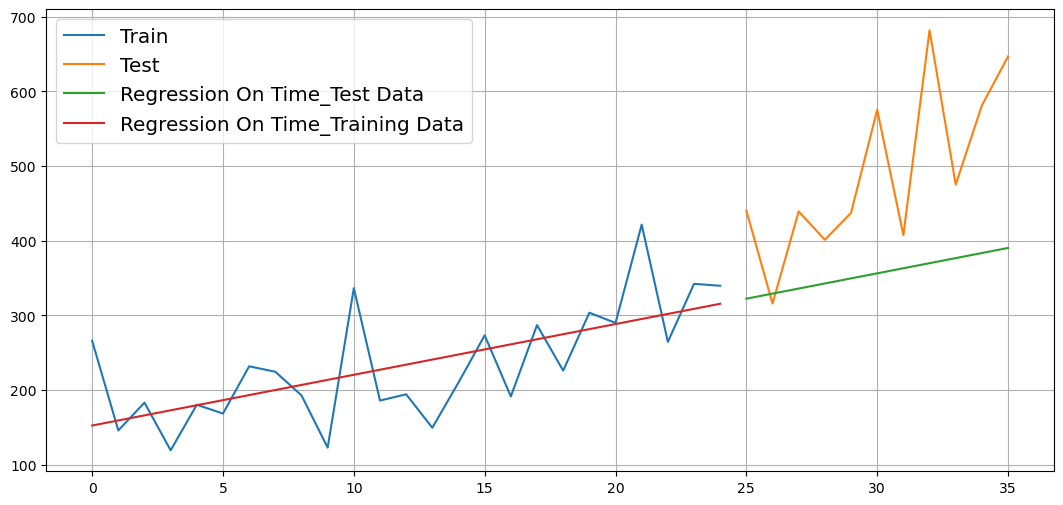

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

### Evaluation (Linear Regression)

In [10]:
from sklearn import metrics
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [11]:
rmse_model1_train = metrics.mean_squared_error(train['Sales'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sales'],train_predictions_model1)

In [12]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sales'],test_predictions_model1)

In [13]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94


# Problem 2

In [14]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [17]:
medical_df=pd.read_csv("C:/Users/Doaa Samir/Downloads/Heart.csv")

In [18]:
medical_df.isnull().sum()

Id           0
Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [19]:
medical_df.head(5)

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,1,0
4,5,41,0,0,130,204,0,2,172,0,1.4,1,0,1,0


In [20]:
X=medical_df[["Age","Chol"]]
X

,Age,Chol
0,63,233
1,67,286
2,67,229
3,37,250
4,41,204
...,...,...
298,45,264
299,68,193
300,57,131
301,57,236


In [21]:
X.isnull().sum()

Age     0
Chol    0
dtype: int64

In [22]:
X.describe()

,Age,Chol
count,303.000000,303.000000
mean,54.438944,246.693069
std,9.038662,51.776918
min,29.000000,126.000000
25%,48.000000,211.000000
50%,56.000000,241.000000
75%,61.000000,275.000000
max,77.000000,564.000000


Text(0, 0.5, 'Age')

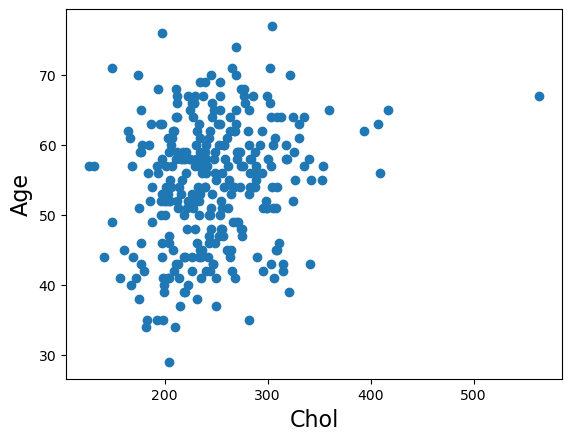

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X.Chol,X.Age)
plt.xlabel("Chol")
plt.ylabel("Age")

In [24]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 9.48726471e-01, -2.64900304e-01],
       [ 1.39200191e+00,  7.60415190e-01],
       [ 1.39200191e+00, -3.42282606e-01],
       [-1.93256387e+00,  6.39744770e-02],
       [-1.48928843e+00, -8.25921990e-01],
       [ 1.72994457e-01, -2.06863578e-01],
       [ 8.37907612e-01,  4.12194834e-01],
       [ 2.83813316e-01,  2.07591432e+00],
       [ 9.48726471e-01,  1.41356778e-01],
       [-1.59462121e-01, -8.45267566e-01],
       [ 2.83813316e-01, -1.05806889e+00],
       [ 1.72994457e-01,  9.15179793e-01],
       [ 1.72994457e-01,  1.80047929e-01],
       [-1.15683185e+00,  3.15466957e-01],
       [-2.70280980e-01, -9.22649867e-01],
       [ 2.83813316e-01, -1.52236270e+00],
       [-7.13556417e-01, -3.42282606e-01],
       [-4.86432616e-02, -1.48826852e-01],
       [-7.13556417e-01,  5.47613861e-01],
       [-6.02737558e-01,  3.73503683e-01],
       [ 1.05954533e+00, -6.90502963e-01],
       [ 3.94632175e-01,  7.02378464e-01],
       [ 3.94632175e-01,  7.21724040e-01],
       [ 3.

In [25]:
model_labels={}
centroids={}
i_score=[]
s_score=[]
for k in range(2,12):
    #model building
    model=KMeans(n_clusters=k)
    #model fit 
    model=model.fit(X)
    
    # get the output labels
    labels=model.labels_
    model_labels[k]=labels
    
    #inertia
    i_score.append(model.inertia_)
    
    #silhouette
    s_score.append(silhouette_score(X,labels))
    
    #centroids
    centroids[k]=model.cluster_centers_
    
    print(f"---- inertia {model.inertia_} silhoutte {silhouette_score(X,labels)}")

---- inertia 375.6618665683702 silhoutte 0.35626070529531595
---- inertia 256.68852626880823 silhoutte 0.3612378289734861
---- inertia 207.46823208949903 silhoutte 0.34601279602772717
---- inertia 166.28132270673882 silhoutte 0.3475356545616124
---- inertia 138.82184820605707 silhoutte 0.35425442064924684
---- inertia 120.51572330817297 silhoutte 0.3398066143432587
---- inertia 105.7691309571827 silhoutte 0.3422650620147047
---- inertia 92.87056363407525 silhoutte 0.3499784628259379
---- inertia 82.54497985721014 silhoutte 0.35178022963558764
---- inertia 75.2812375023738 silhoutte 0.3484266835271056


In [26]:
K_labels=model_labels[3]

In [27]:
k_centroid=centroids[3]

Text(0, 0.5, 'Age')

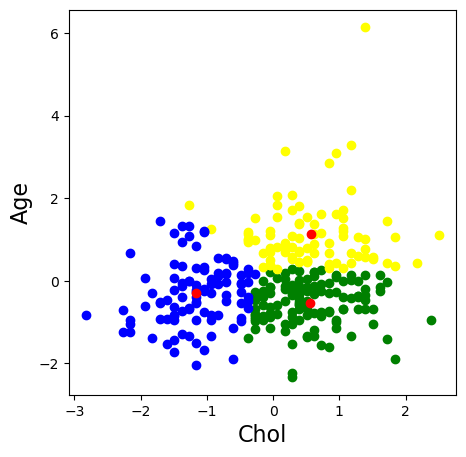

In [28]:
fig,ax=plt.subplots(figsize=(5,5))
# 1st cluster
plt.scatter(X[K_labels == 0,0],X[K_labels == 0,1],c="green",label="cluster1")
#2nd cluster
plt.scatter(X[K_labels == 1,0],X[K_labels == 1,1],c="yellow",label="cluster2")
#3rd cluster
plt.scatter(X[K_labels == 2,0],X[K_labels == 2,1],c="blue",label="cluster3")
#3 cluster centroids
plt.scatter(k_centroid[:,0],k_centroid[:,1],c="r",label="centroids")
plt.xlabel("Chol")
plt.ylabel("Age")

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(medical_df)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 2


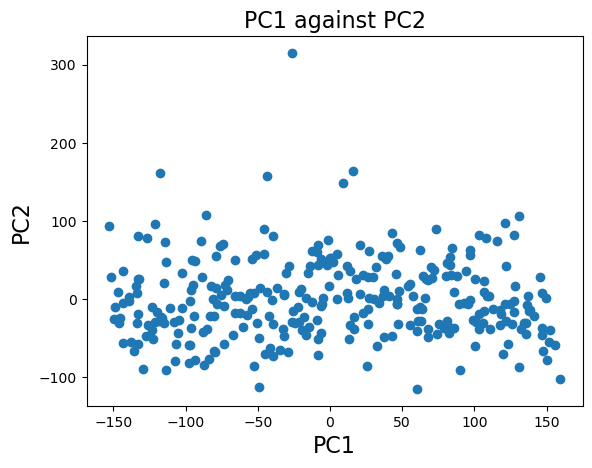

In [30]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [31]:
y=medical_df.AHD

[Text(0.5, 1.0, 'heart attack data pca projection')]

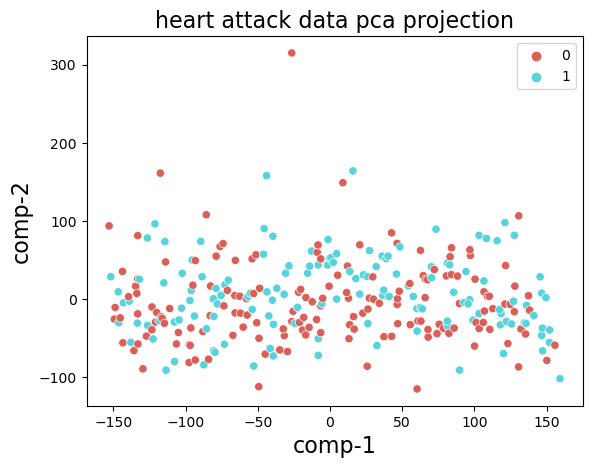

In [32]:
x= pd.DataFrame()
x["y"] = y
x["comp-1"] = principalComponents[:,0]
x["comp-2"] = principalComponents[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=x.y.tolist(),
                palette=sns.color_palette("hls",2),
                data=x).set(title="heart attack data pca projection")

In [33]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(medical_df)

C:\Users\Doaa Samir\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Doaa Samir\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.111s...
[t-SNE] Computed neighbors for 303 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 31.643812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.202801
[t-SNE] KL divergence after 1000 iterations: 0.497612


[Text(0.5, 1.0, 'heart attack data T-SNE projection')]

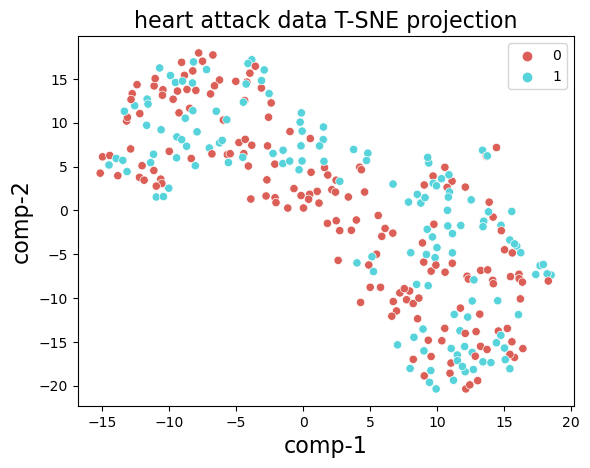

In [34]:
x= pd.DataFrame()
x["y"] = y
x["comp-1"] = z[:,0]
x["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=x.y.tolist(),
                palette=sns.color_palette("hls",2),
                data=x).set(title="heart attack data T-SNE projection")

In [35]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(principalComponents)

C:\Users\Doaa Samir\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Doaa Samir\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.008s...
[t-SNE] Computed neighbors for 303 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 25.663730
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.160789
[t-SNE] KL divergence after 1000 iterations: 0.354516


[Text(0.5, 1.0, 'heart attack data T-SNE projection on pca')]

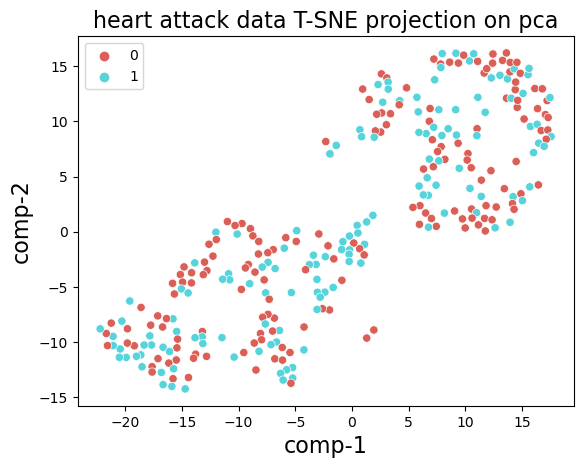

In [36]:
x= pd.DataFrame()
x["y"] = y
x["comp-1"] = z[:,0]
x["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=x.y.tolist(),
                palette=sns.color_palette("hls",2),
                data=x).set(title="heart attack data T-SNE projection on pca")

# Problem 3 (Bonus)

In [37]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
  
ratings = pd.read_csv("C:/Users/Doaa Samir/Downloads/ratings.csv")
ratings.head()
  
movies = pd.read_csv("C:/Users/Doaa Samir/Downloads/movies.csv")
movies.head()
  
n_ratings = len(ratings)
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())
  
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")
  
user_freq = ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
user_freq.head()
  
  
# Find Lowest and Highest rated movies:
mean_rating = ratings.groupby('movieId')[['rating']].mean()
# Lowest rated movies
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]
# Highest rated movies
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]
# show number of people who rated movies rated movie highest
ratings[ratings['movieId']==highest_rated]
# show number of people who rated movies rated movie lowest
ratings[ratings['movieId']==lowest_rated]
  
## the above movies has very low dataset. We will use bayesian average
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()
  
# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix
  
def create_matrix(df):
      
    N = len(df['userId'].unique())
    M = len(df['movieId'].unique())
      
    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
      
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
      
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]
  
    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
      
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
  
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)
  
from sklearn.neighbors import NearestNeighbors
"""
Find similar movies using KNN
"""
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
      
    neighbour_ids = []
      
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids
  
  
movie_titles = dict(zip(movies['movieId'], movies['title']))
  
movie_id = 3
  
similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]
  
print(f"Since you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average ratings per user: 165.3
Average ratings per movie: 10.37
Since you watched Grumpier Old Men (1995)
Grumpy Old Men (1993)
Striptease (1996)
Nutty Professor, The (1996)
Twister (1996)
Father of the Bride Part II (1995)
Broken Arrow (1996)
Bio-Dome (1996)
Truth About Cats & Dogs, The (1996)
Sabrina (1995)
Birdcage, The (1996)
